In [36]:
import sqlite3 as sql
import pandas as pd

In [ ]:
# 1. Establish a connection to the SQLite Database

In [38]:
conn = sql.connect('adventure works new.db')
cursor = conn.cursor()

In [ ]:
# 2. Write a SQL query to retrieve the sales and territory data and group the resulting data

In [40]:
query= ''' select
TerritoryKey, Region, SUM(OrderValue) as TotalSales
from Demographics_update
group by TerritoryKey, Region'''

In [ ]:
#3. Load the data into a Pandas dataframe

In [42]:
df=pd.read_sql_query(query,conn)

In [ ]:
# 4. Check the datatypes to ensure they are the correct types

In [44]:
print(df.dtypes)

TerritoryKey      int64
Region           object
TotalSales      float64
dtype: object


In [ ]:
# 4.1 View the entire table to look at the regions and their total sales

In [60]:
print(df)

   TerritoryKey                   Region  TotalSales
0             1  United States NorthWest  3095074.30
1             2  United States NorthEast     6401.56
2             3    United States Central     3143.06
3             4  United States SouthWest  4822794.68
4             5  United States SouthEast    11585.63
5             6                   Canada  1769245.47
6             7                   France  2362642.77
7             8                  Germany  2524679.60
8             9                Australia  7416455.01
9            10           United Kingdom  2902561.58


In [ ]:
# 5. Analyse sales performance by Region

In [46]:
high_performing_regions = df[df['TotalSales'] == df['TotalSales'].max()]
low_performing_regions = df[df['TotalSales'] == df['TotalSales'].min()]

In [ ]:
# 6. Retrive result for highest performing region, highest performing region is Australia

In [48]:
print("\nHigh-performing region(s):")
print(high_performing_regions)


High-performing region(s):
   TerritoryKey     Region  TotalSales
8             9  Australia  7416455.01


In [ ]:
# 7. Retrive result for lowest performing region, lowest performing region is United States Central

In [50]:
print("\nLow-performing region(s):")
print(low_performing_regions)


Low-performing region(s):
   TerritoryKey                 Region  TotalSales
2             3  United States Central     3143.06


In [ ]:
# 8. Import matplotlib for visualization of the resulting data

In [52]:
import matplotlib.pyplot as plt

<Figure size 1000x600 with 0 Axes>

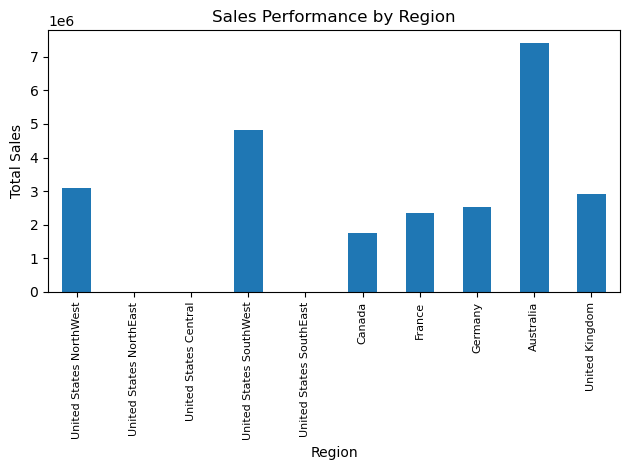

In [54]:
plt.figure(figsize = (10,6))
df.plot(kind = 'bar', x='Region', y='TotalSales', legend = False)
plt.title('Sales Performance by Region')
plt.ylabel('Total Sales')
plt.xlabel('Region')
plt.xticks(rotation = 90, fontsize = 8)
plt.tight_layout()
plt.savefig("Sales Performance by Region.png", dpi = 300)
plt.show()

In [ ]:
# 9. Close the connection

In [30]:
conn.close()